<a href="https://colab.research.google.com/github/harshithagoud3504/LGMVIP-DataScience/blob/main/stock_market.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from sklearn.metrics import mean_squared_error

import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
import pandas as pd
import numpy as np
import math 
warnings.filterwarnings('ignore')

In [ ]:
a=pd.read_csv("/content/drive/MyDrive/stockmarket.csv")

In [ ]:
a=a.replace('[^\d.]','',regex=True).astype(float)

In [ ]:
a

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,20180928.0,234.05,235.95,230.20,233.50,233.75,3069914.0,7162.35
1,20180927.0,234.55,236.80,231.10,233.80,233.25,5082859.0,11859.95
2,20180926.0,240.00,240.00,232.50,235.00,234.25,2240909.0,5248.60
3,20180925.0,233.30,236.75,232.00,236.25,236.10,2349368.0,5503.90
4,20180924.0,233.55,239.20,230.75,234.00,233.30,3423509.0,7999.55
...,...,...,...,...,...,...,...,...
2030,20100727.0,117.60,119.50,112.00,118.80,118.65,586100.0,694.98
2031,20100726.0,120.10,121.00,117.10,117.10,117.60,658440.0,780.01
2032,20100723.0,121.80,121.95,120.25,120.35,120.65,281312.0,340.31
2033,20100722.0,120.30,122.00,120.25,120.75,120.90,293312.0,355.17


In [ ]:
a.head

<bound method NDFrame.head of             Date    Open    High     Low    Last   Close  \
0     20180928.0  234.05  235.95  230.20  233.50  233.75   
1     20180927.0  234.55  236.80  231.10  233.80  233.25   
2     20180926.0  240.00  240.00  232.50  235.00  234.25   
3     20180925.0  233.30  236.75  232.00  236.25  236.10   
4     20180924.0  233.55  239.20  230.75  234.00  233.30   
...          ...     ...     ...     ...     ...     ...   
2030  20100727.0  117.60  119.50  112.00  118.80  118.65   
2031  20100726.0  120.10  121.00  117.10  117.10  117.60   
2032  20100723.0  121.80  121.95  120.25  120.35  120.65   
2033  20100722.0  120.30  122.00  120.25  120.75  120.90   
2034  20100721.0  122.10  123.00  121.05  121.10  121.55   

      Total Trade Quantity  Turnover (Lacs)  
0                3069914.0          7162.35  
1                5082859.0         11859.95  
2                2240909.0          5248.60  
3                2349368.0          5503.90  
4                34

In [ ]:
a.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2035 entries, 0 to 2034
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Date                  2035 non-null   float64
 1   Open                  2035 non-null   float64
 2   High                  2035 non-null   float64
 3   Low                   2035 non-null   float64
 4   Last                  2035 non-null   float64
 5   Close                 2035 non-null   float64
 6   Total Trade Quantity  2035 non-null   float64
 7   Turnover (Lacs)       2035 non-null   float64
dtypes: float64(8)
memory usage: 127.3 KB


In [ ]:
a.describe

<bound method NDFrame.describe of             Date    Open    High     Low    Last   Close  \
0     20180928.0  234.05  235.95  230.20  233.50  233.75   
1     20180927.0  234.55  236.80  231.10  233.80  233.25   
2     20180926.0  240.00  240.00  232.50  235.00  234.25   
3     20180925.0  233.30  236.75  232.00  236.25  236.10   
4     20180924.0  233.55  239.20  230.75  234.00  233.30   
...          ...     ...     ...     ...     ...     ...   
2030  20100727.0  117.60  119.50  112.00  118.80  118.65   
2031  20100726.0  120.10  121.00  117.10  117.10  117.60   
2032  20100723.0  121.80  121.95  120.25  120.35  120.65   
2033  20100722.0  120.30  122.00  120.25  120.75  120.90   
2034  20100721.0  122.10  123.00  121.05  121.10  121.55   

      Total Trade Quantity  Turnover (Lacs)  
0                3069914.0          7162.35  
1                5082859.0         11859.95  
2                2240909.0          5248.60  
3                2349368.0          5503.90  
4              

In [ ]:
a['Date'] = pd.to_datetime(a['Date'])
a.dtypes

Date                    datetime64[ns]
Open                           float64
High                           float64
Low                            float64
Last                           float64
Close                          float64
Total Trade Quantity           float64
Turnover (Lacs)                float64
dtype: object

In [ ]:
a = a.sort_values('Date')
a.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
2034,1970-01-01 00:00:00.020100721,122.1,123.00,121.05,121.10,121.55,658666.0,803.56
2033,1970-01-01 00:00:00.020100722,120.3,122.00,120.25,120.75,120.90,293312.0,355.17
2032,1970-01-01 00:00:00.020100723,121.8,121.95,120.25,120.35,120.65,281312.0,340.31
2031,1970-01-01 00:00:00.020100726,120.1,121.00,117.10,117.10,117.60,658440.0,780.01
2030,1970-01-01 00:00:00.020100727,117.6,119.50,112.00,118.80,118.65,586100.0,694.98


Text(0, 0.5, 'Close')

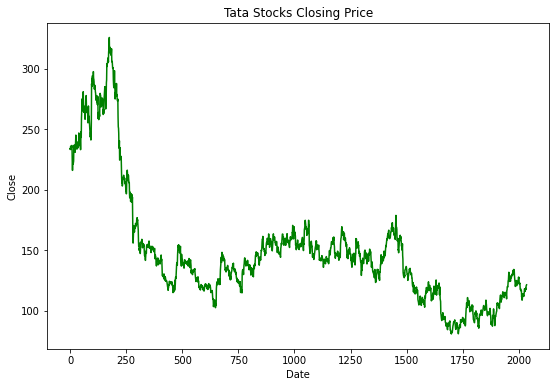

In [ ]:
plt.figure(figsize = (9,6))
plt.title('Tata Stocks Closing Price')
plt.plot(a['Close'],'g')
plt.xlabel('Date',fontsize=10)
plt.ylabel('Close',fontsize=10)

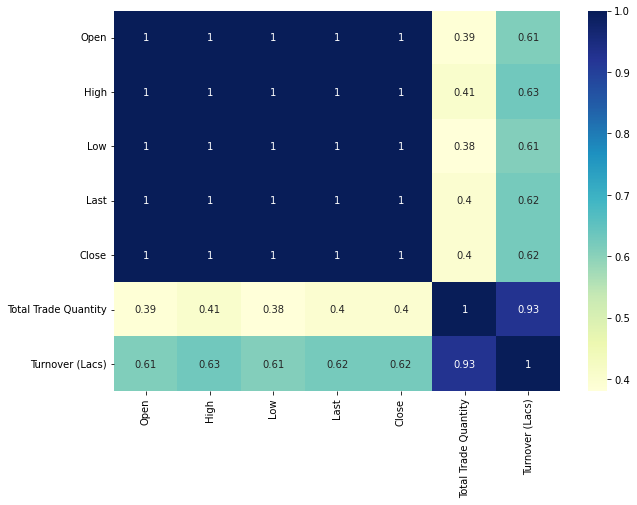

In [ ]:
dcorr = a.corr()
top_corr_features = dcorr.index
plt.figure(figsize=(10,7))
sns.heatmap(a[top_corr_features].corr(), annot=True, cmap="YlGnBu")

**MinMaxScaler**

In [ ]:
data_close = a.reset_index()['Close']
data_close.head()
scaler = MinMaxScaler(feature_range = (0, 1))
data_close = scaler.fit_transform(np.array(data_close).reshape(-1, 1))

**Splitting train, Test data**


In [ ]:
train_size = int(len(data_close)*0.70)
test_size = len(data_close) - train_size
train, test = data_close[0 : train_size, :], data_close[train_size : len(data_close), :1]

In [ ]:
def create_matrix(ds, time_step=1):
    dataX, dataY = [], []
    for i in range(len(ds)-time_step-1):
        a = ds[i:(i+time_step),0]
        dataX.append(a)
        dataY.append(ds[i+time_step,0])
    return np.array(dataX), np.array(dataY)

In [ ]:
step=100 
X_train, y_train = create_matrix(train, step)
X_test, y_test = create_matrix(test, step)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(1323, 100) (1323,)
(510, 100) (510,)


In [ ]:
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

**LSTM Model**

In [ ]:
model = Sequential()
model.add(LSTM(50, return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history = model.fit(X_train, y_train, validation_split=0.1, epochs=77, batch_size=64, verbose=1, shuffle=True).history

Epoch 1/77
19/19 [==============================] - 14s 474ms/step - loss: 0.0082 - val_loss: 0.0016
Epoch 2/77
19/19 [==============================] - 7s 381ms/step - loss: 0.0017 - val_loss: 0.0019
Epoch 3/77
19/19 [==============================] - 6s 280ms/step - loss: 0.0010 - val_loss: 0.0012
Epoch 4/77
19/19 [==============================] - 4s 197ms/step - loss: 9.0365e-04 - val_loss: 0.0012
Epoch 5/77
19/19 [==============================] - 4s 192ms/step - loss: 8.3678e-04 - val_loss: 0.0011
Epoch 6/77
19/19 [==============================] - 4s 199ms/step - loss: 8.0298e-04 - val_loss: 0.0011
Epoch 7/77
19/19 [==============================] - 4s 193ms/step - loss: 7.7133e-04 - val_loss: 0.0010
Epoch 8/77
19/19 [==============================] - 4s 196ms/step - loss: 7.7086e-04 - val_loss: 0.0011
Epoch 9/77
19/19 [==============================] - 4s 200ms/step - loss: 7.5503e-04 - val_loss: 9.1405e-04
Epoch 10/77
19/19 [==============================] - 4s 193ms/step - lo

In [ ]:

train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

16/16 [==============================] - 1s 41ms/step


In [ ]:
# Reversing the MinMax Scaler
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)

In [ ]:
math.sqrt(mean_squared_error(y_train, train_predict))
math.sqrt(mean_squared_error(y_test,test_predict))

205.272777824195

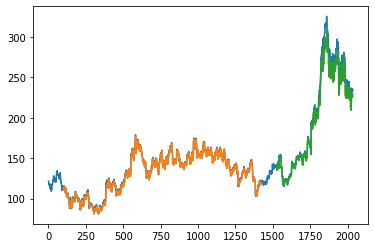

In [ ]:
### Visualise the Predictions
look_back = 100
train_num_pyredict_plot = np.empty_like(data_close)
train_num_pyredict_plot[:, :] = np.nan
train_num_pyredict_plot[look_back : len(train_predict) + look_back, :] = train_predict
test_predict_plot = np.empty_like(data_close)
test_predict_plot[:, :] = np.nan
test_predict_plot[len(train_predict) + (look_back * 2) + 1 : len(data_close) - 1, :] = test_predict
plt.plot(scaler.inverse_transform(data_close))
plt.plot(train_num_pyredict_plot)
plt.plot(test_predict_plot)
plt.show()

In [ ]:
### Future Prediction Model
x_inum_pyut=test[307:].reshape(1, -1)
x_inum_pyut.shape
temp_inum_pyut = list(x_inum_pyut)
temp_inum_pyut = temp_inum_pyut[0].tolist()
temp_inum_pyut = list(x_inum_pyut)
temp_inum_pyut = temp_inum_pyut[0].tolist()

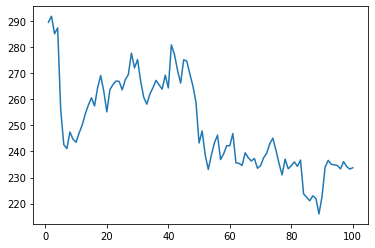

In [ ]:
day_new = np.arange(1, 101)
day_pred = np.arange(101, 131)
plt.plot(day_new, scaler.inverse_transform(data_close[1935 : ]))